In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data cuaca dan penerbangan siap.csv')
df = df.drop("Unnamed: 0", axis=1)
df

Date In_Out    Location  All_Flights  Rainfall  Evaporation  \
0      2008-02-02      I      Sydney           29       6.0     3.400000   
1      2008-02-02      I      Sydney           12       6.0     3.400000   
2      2008-02-02      I      Sydney           17       6.0     3.400000   
3      2008-02-02      I      Sydney          136       6.0     3.400000   
4      2008-02-02      I      Sydney           29       6.0     3.400000   
...           ...    ...         ...          ...       ...          ...   
57948  2017-06-06      O      Sydney            9       0.0     2.200000   
57949  2017-06-06      I  Townsville           13       0.0     6.890909   
57950  2017-06-06      I  Townsville            9       0.0     6.890909   
57951  2017-06-06      O  Townsville           12       0.0     6.890909   
57952  2017-06-06      O  Townsville            9       0.0     6.890909   

       Sunshine  MinTemp  MaxTemp  
0      2.700000     19.5     25.6  
1      2.700000     19.5     25.6  
2      2.700000     19.5     25.6  
3      2.700000     19.5     25.6  
4      2.700000     19.5     25.6  
...         ...      ...      ...  
57948  7.200000      9.1     17.9  
57949  7.661111     15.5     26.5  
57950  7.661111     15.5     26.5  
57951  7.661111     15.5     26.5  
57952  7.661111     15.5     26.5  

[57953 rows x 9 columns]

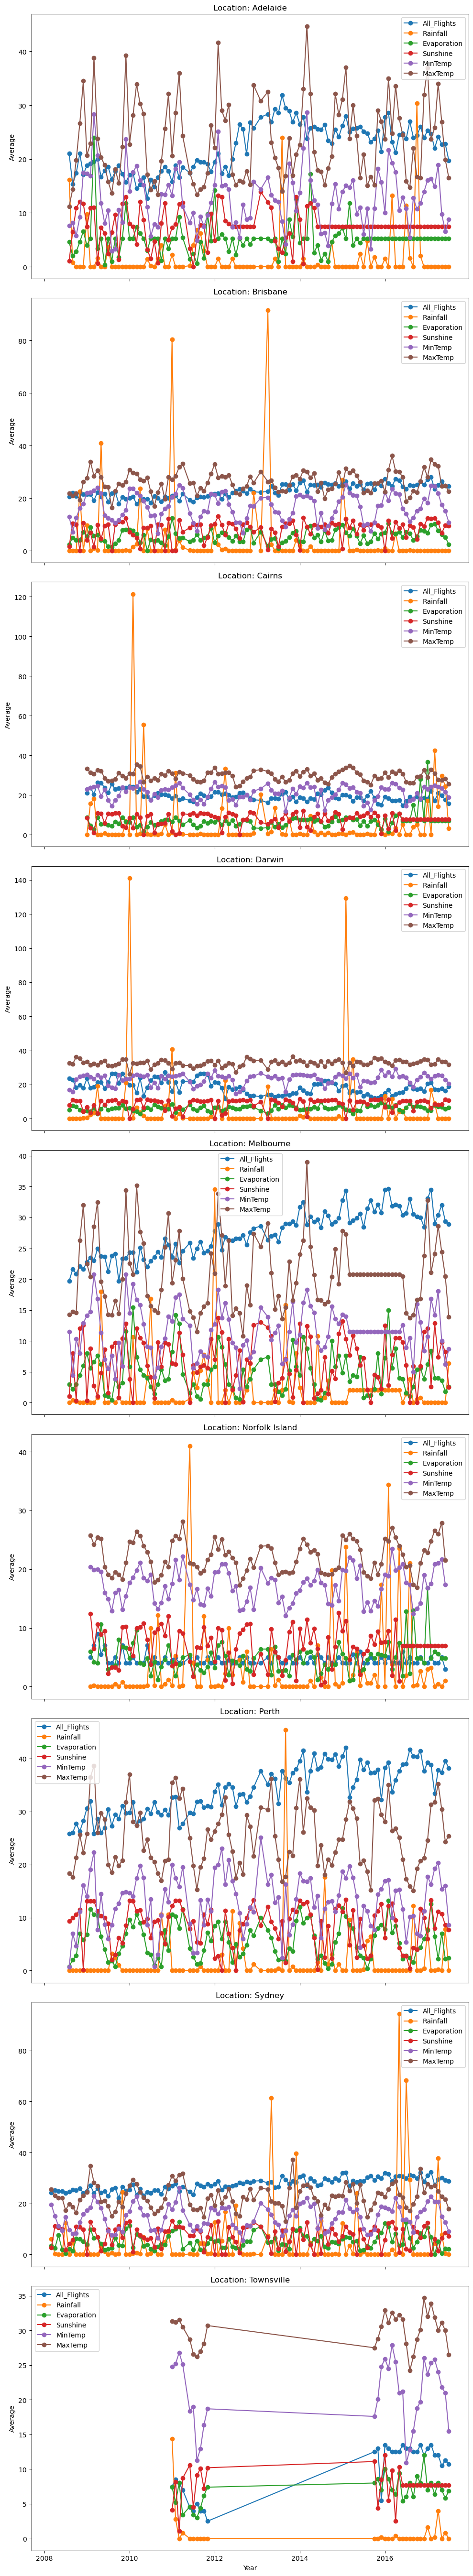

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Location, Year, and Month, calculate monthly averages
monthly_avg = df.groupby(['Location', df['Date'].dt.year.rename('Year'), df['Date'].dt.month.rename('Month')]).mean().reset_index()

# Plotting
locations = monthly_avg['Location'].unique()
num_locations = len(locations)

fig, axes = plt.subplots(num_locations, 1, figsize=(10, 6*num_locations), sharex=True)

for i, location in enumerate(locations):
    ax = axes[i]
    data_loc = monthly_avg[monthly_avg['Location'] == location]
    
    # Plotting each variable against year
    ax.plot(data_loc['Year'] + data_loc['Month']/12, data_loc['All_Flights'], marker='o', linestyle='-', label='All_Flights')
    ax.plot(data_loc['Year'] + data_loc['Month']/12, data_loc['Rainfall'], marker='o', linestyle='-', label='Rainfall')
    ax.plot(data_loc['Year'] + data_loc['Month']/12, data_loc['Evaporation'], marker='o', linestyle='-', label='Evaporation')
    ax.plot(data_loc['Year'] + data_loc['Month']/12, data_loc['Sunshine'], marker='o', linestyle='-', label='Sunshine')
    ax.plot(data_loc['Year'] + data_loc['Month']/12, data_loc['MinTemp'], marker='o', linestyle='-', label='MinTemp')
    ax.plot(data_loc['Year'] + data_loc['Month']/12, data_loc['MaxTemp'], marker='o', linestyle='-', label='MaxTemp')
    
    ax.set_title(f'Location: {location}')
    ax.set_ylabel('Average')
    ax.legend()

plt.xlabel('Year')
plt.tight_layout()
plt.show()


In [3]:
for location in locations:
    data_loc = monthly_avg[monthly_avg['Location'] == location]
    filename = f'{location}_RATA-RATA_BERSIH.csv'
    data_loc.to_csv(filename, index=False)

    print(f'{filename} saved successfully.')

Adelaide_RATA-RATA_BERSIH.csv saved successfully.
Brisbane_RATA-RATA_BERSIH.csv saved successfully.
Cairns_RATA-RATA_BERSIH.csv saved successfully.
Darwin_RATA-RATA_BERSIH.csv saved successfully.
Melbourne_RATA-RATA_BERSIH.csv saved successfully.
Norfolk Island_RATA-RATA_BERSIH.csv saved successfully.
Perth_RATA-RATA_BERSIH.csv saved successfully.
Sydney_RATA-RATA_BERSIH.csv saved successfully.
Townsville_RATA-RATA_BERSIH.csv saved successfully.


### Adelaide

#### All_Flights

In [4]:
df1 = pd.read_csv('Adelaide_RATA-RATA_BERSIH.csv')
# df1 = df.drop("Unnamed: 0", axis=1)
df1

Location  Year  Month  All_Flights  Rainfall  Evaporation   Sunshine  \
0    Adelaide  2008      7    21.000000      16.2     4.600000   1.100000   
1    Adelaide  2008      8    15.333333       0.8     2.000000   6.500000   
2    Adelaide  2008      9    17.384615       0.0     2.800000  10.900000   
3    Adelaide  2008     10    21.000000       0.0     4.600000  12.100000   
4    Adelaide  2008     11    17.142857       0.0     6.600000  11.700000   
..        ...   ...    ...          ...       ...          ...        ...   
100  Adelaide  2017      2    22.000000       0.0     5.253866   7.484455   
101  Adelaide  2017      3    24.187500       0.0     5.253866   7.484455   
102  Adelaide  2017      4    22.750000       0.0     5.253866   7.484455   
103  Adelaide  2017      5    22.812500       0.0     5.253866   7.484455   
104  Adelaide  2017      6    19.722222       0.0     5.253866   7.484455   

     MinTemp  MaxTemp  
0        7.6     11.2  
1        8.2     14.4  
2        5.8     19.8  
3        9.2     26.6  
4       17.5     34.5  
..       ...      ...  
100     14.9     25.8  
101     18.9     34.0  
102      9.8     26.9  
103      6.6     19.9  
104      8.8     16.5  

[105 rows x 9 columns]

In [5]:
df1['Date'] = pd.to_datetime(df1[['Year', 'Month']].assign(day=1)).dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(1)

# Drop 'Year' and 'Month' columns if not needed anymore
df1 = df1.drop(['Year', 'Month'], axis=1)

df1

Location  All_Flights  Rainfall  Evaporation   Sunshine  MinTemp  \
0    Adelaide    21.000000      16.2     4.600000   1.100000      7.6   
1    Adelaide    15.333333       0.8     2.000000   6.500000      8.2   
2    Adelaide    17.384615       0.0     2.800000  10.900000      5.8   
3    Adelaide    21.000000       0.0     4.600000  12.100000      9.2   
4    Adelaide    17.142857       0.0     6.600000  11.700000     17.5   
..        ...          ...       ...          ...        ...      ...   
100  Adelaide    22.000000       0.0     5.253866   7.484455     14.9   
101  Adelaide    24.187500       0.0     5.253866   7.484455     18.9   
102  Adelaide    22.750000       0.0     5.253866   7.484455      9.8   
103  Adelaide    22.812500       0.0     5.253866   7.484455      6.6   
104  Adelaide    19.722222       0.0     5.253866   7.484455      8.8   

     MaxTemp       Date  
0       11.2 2008-08-31  
1       14.4 2008-09-30  
2       19.8 2008-10-31  
3       26.6 2008-11-30  
4       34.5 2008-12-31  
..       ...        ...  
100     25.8 2017-03-31  
101     34.0 2017-04-30  
102     26.9 2017-05-31  
103     19.9 2017-06-30  
104     16.5 2017-07-31  

[105 rows x 8 columns]

In [6]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
df1['All_Flights_diff'] = df1['All_Flights'].diff()

# Drop NaN values after differencing
df1.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df1['All_Flights_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -11.522283499373465
p-value: 4.013065874422407e-21
Critical Values:
	1%: -3.4961490537199116
	5%: -2.8903209639580556
	10%: -2.5821223452518263


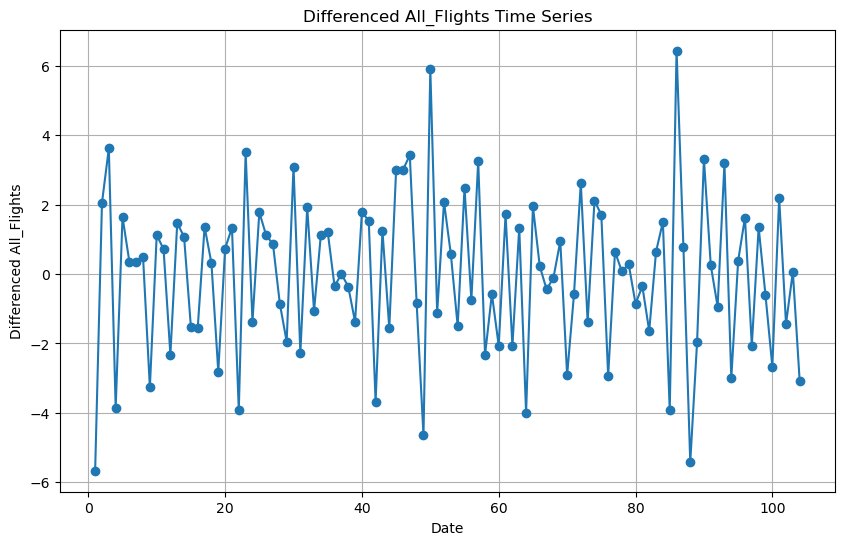

In [7]:
import matplotlib.pyplot as plt

# Plot time series of 'All_Flights_diff'
plt.figure(figsize=(10, 6))
plt.plot(df1['All_Flights_diff'], marker='o', linestyle='-')
plt.title('Differenced All_Flights Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced All_Flights')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

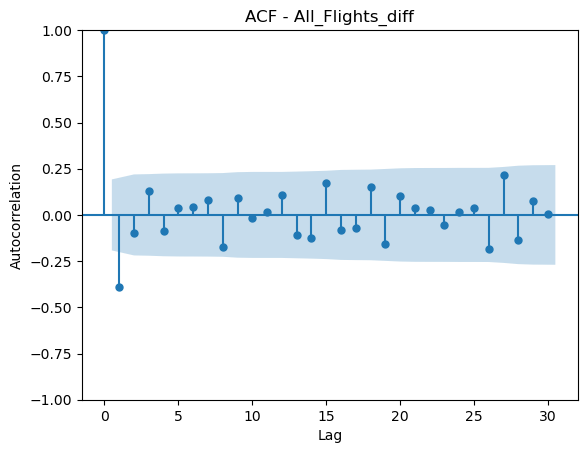

<Figure size 1200x600 with 0 Axes>

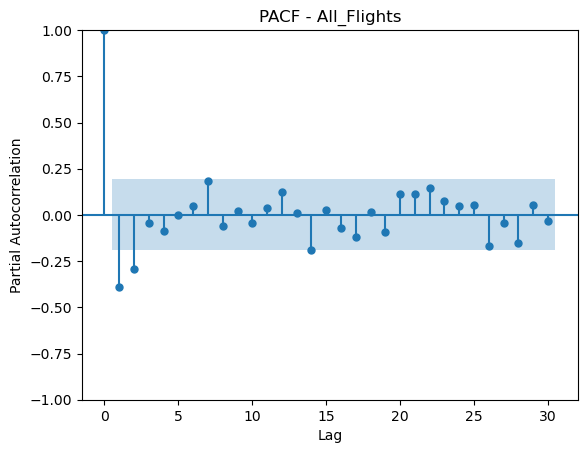

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df1['All_Flights_diff'], lags=30, title='ACF - All_Flights_diff')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df1['All_Flights_diff'], lags=30, title='PACF - All_Flights')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       All_Flights_diff   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -224.994
Date:                Thu, 20 Jun 2024   AIC                            455.987
Time:                        17:43:57   BIC                            463.891
Sample:                             0   HQIC                           459.189
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4102      0.083     -4.953      0.000      -0.573      -0.248
ma.L1         -0.9996      2.772     -0.361      0.718      -6.432       4.433
sigma2         4.3837     12.150      0.361      0.7

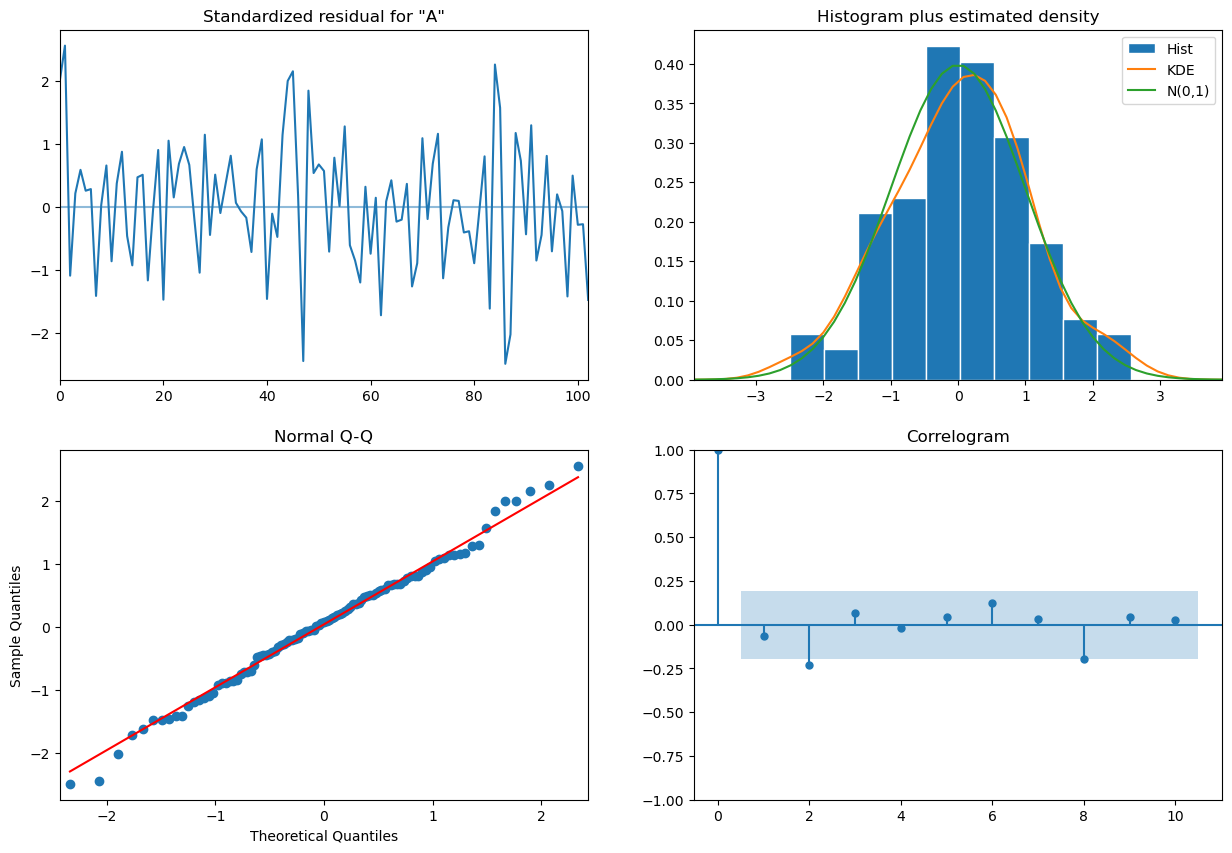

104    1.285017
105   -0.509901
106    0.226445
107   -0.075633
108    0.048291
109   -0.002547
110    0.018309
111    0.009753
112    0.013263
113    0.011823
114    0.012413
115    0.012171
Name: predicted_mean, dtype: float64


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df1['All_Flights_diff'], order=(1, 1, 1))

# Melatih model ARIMA
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast)


#### Rainfall

In [10]:
from statsmodels.tsa.stattools import adfuller
# # Step 1: Apply differencing to 'All_Flights' column
# df1['Rainfall_diff'] = df1['Rainfall'].diff()

# # Drop NaN values after differencing
# df1.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df1['Rainfall'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -10.265486697011486
p-value: 4.129876476123679e-18
Critical Values:
	1%: -3.4954932834550623
	5%: -2.8900369024285117
	10%: -2.5819706975209726


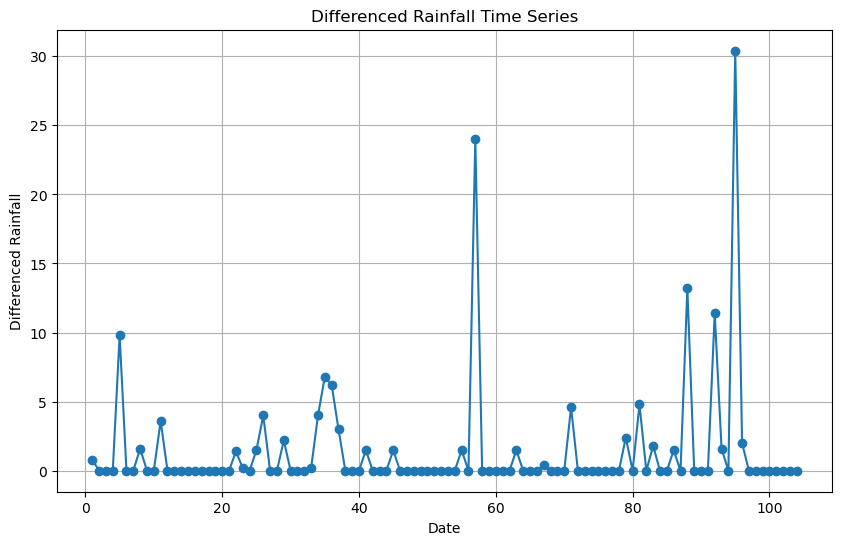

In [11]:
import matplotlib.pyplot as plt

# Plot time series of 'All_Flights_diff'
plt.figure(figsize=(10, 6))
plt.plot(df1['Rainfall'], marker='o', linestyle='-')
plt.title('Differenced Rainfall Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Rainfall')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

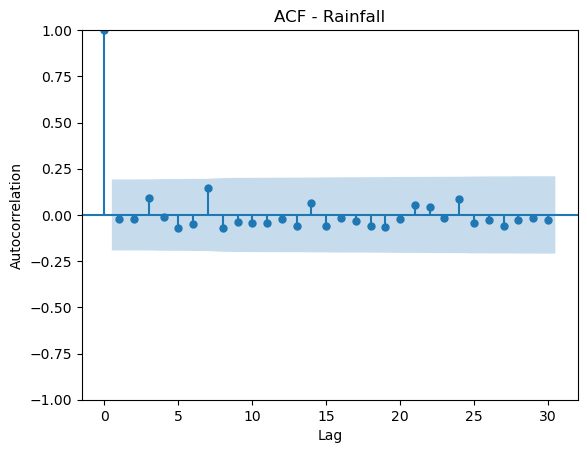

<Figure size 1200x600 with 0 Axes>

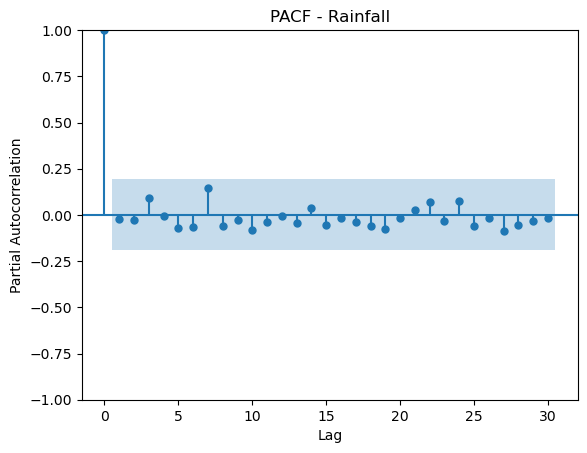

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df1['Rainfall'], lags=30, title='ACF - Rainfall')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df1['Rainfall'], lags=30, title='PACF - Rainfall')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: Use

                               SARIMAX Results                                
Dep. Variable:               Rainfall   No. Observations:                  104
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -298.418
Date:                Thu, 20 Jun 2024   AIC                            606.836
Time:                        17:43:59   BIC                            620.058
Sample:                             0   HQIC                           612.192
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4375      1.021      1.407      0.159      -0.564       3.439
ar.L1         -0.8314      0.907     -0.917      0.359      -2.609       0.946
ar.L2         -0.0692      0.261     -0.265      0.7

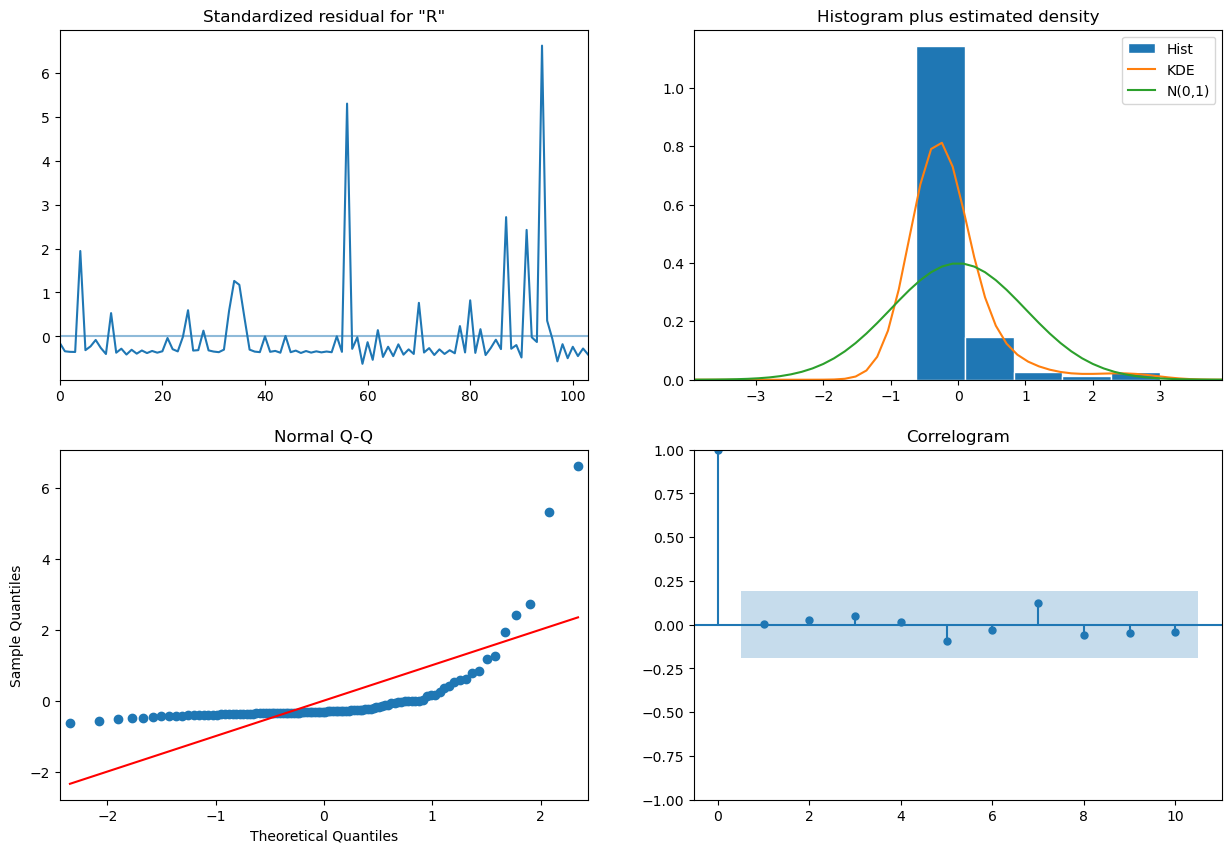

104    1.284628
105    1.664136
106    1.259732
107    1.569698
108    1.339971
109    1.509521
110    1.384451
111    1.476704
112    1.408658
113    1.458849
114    1.421828
115    1.449135
Name: predicted_mean, dtype: float64


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df1['Rainfall'], order=(2, 0, 1))

# Melatih model ARIMA
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast)


#### MaxTemp

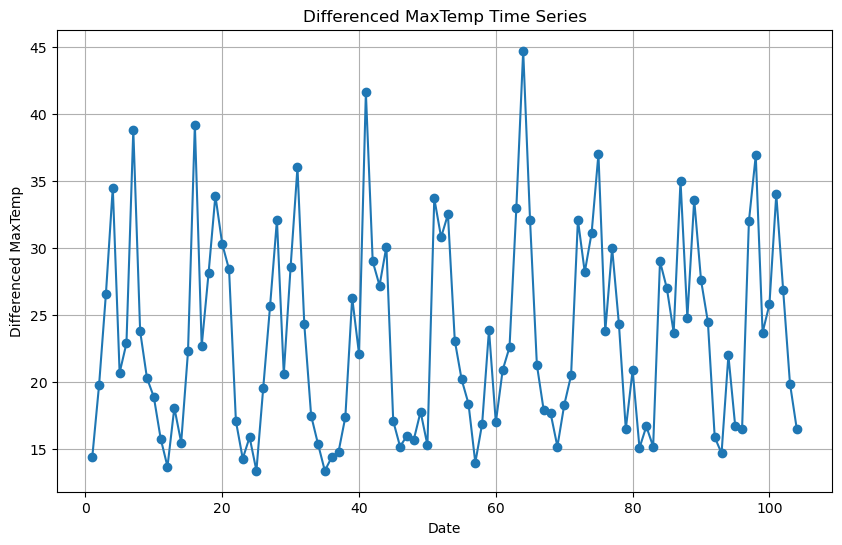

In [14]:
import matplotlib.pyplot as plt

# Plot time series of 'All_Flights_diff'
plt.figure(figsize=(10, 6))
plt.plot(df1['MaxTemp'], marker='o', linestyle='-')
plt.title('Differenced MaxTemp Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced MaxTemp')
plt.grid(True)
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller
# # Step 1: Apply differencing to 'All_Flights' column
# df1['Rainfall_diff'] = df1['Rainfall'].diff()

# # Drop NaN values after differencing
# df1.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df1['MaxTemp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -2.433629372140541
p-value: 0.13246881583075953
Critical Values:
	1%: -3.503514579651927
	5%: -2.893507960466837
	10%: -2.583823615311909


<Figure size 1200x600 with 0 Axes>

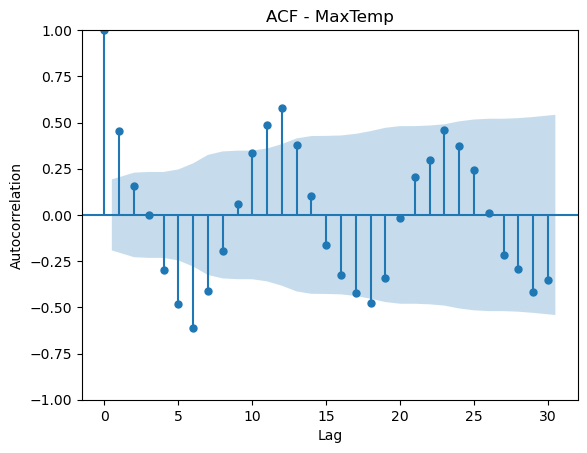

<Figure size 1200x600 with 0 Axes>

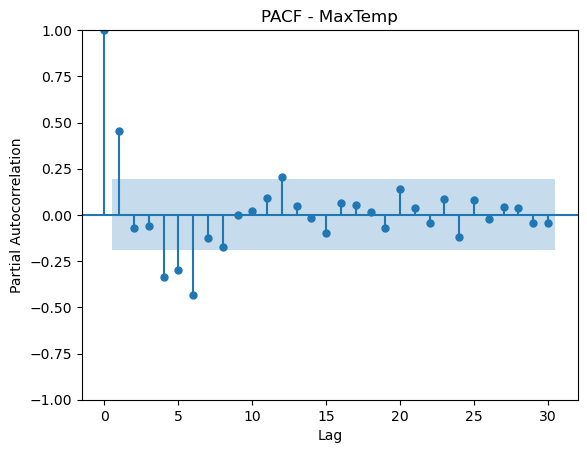

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df1['MaxTemp'], lags=30, title='ACF - MaxTemp')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df1['MaxTemp'], lags=30, title='PACF - MaxTemp')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                MaxTemp   No. Observations:                  104
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -335.570
Date:                Thu, 20 Jun 2024   AIC                            681.139
Time:                        17:44:00   BIC                            694.361
Sample:                             0   HQIC                           686.496
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3347      0.379     61.567      0.000      22.592      24.078
ar.L1          1.3174      0.100     13.110      0.000       1.120       1.514
ar.L2         -0.5732      0.088     -6.488      0.0

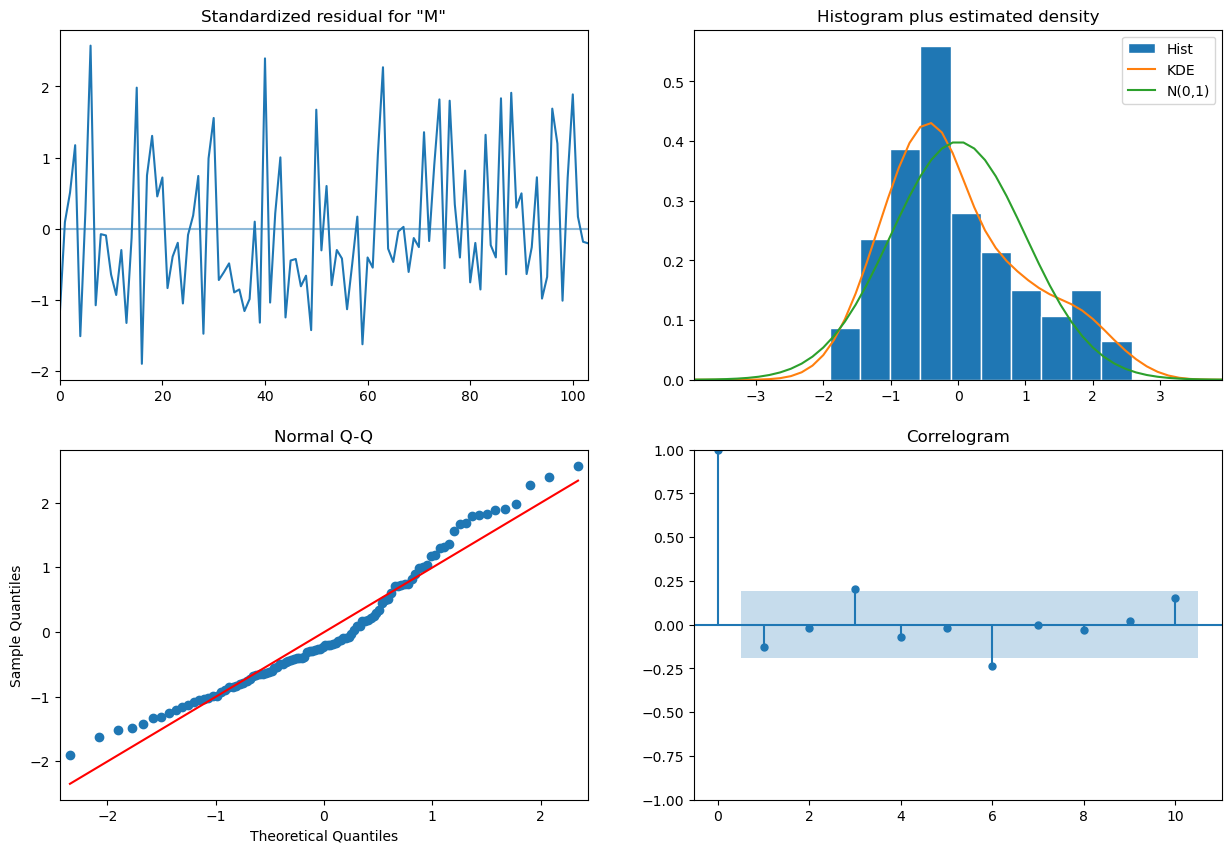

104    17.400211
105    19.434411
106    21.598218
107    23.282759
108    24.261634
109    24.585597
110    24.451284
111    24.088645
112    23.687901
113    23.367836
114    23.175898
115    23.106504
Name: predicted_mean, dtype: float64


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df1['MaxTemp'], order=(2, 0, 1))

# Melatih model ARIMA
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast)


In [18]:
df.head()

Date In_Out Location  All_Flights  Rainfall  Evaporation  Sunshine  \
0 2008-02-02      I   Sydney           29       6.0          3.4       2.7   
1 2008-02-02      I   Sydney           12       6.0          3.4       2.7   
2 2008-02-02      I   Sydney           17       6.0          3.4       2.7   
3 2008-02-02      I   Sydney          136       6.0          3.4       2.7   
4 2008-02-02      I   Sydney           29       6.0          3.4       2.7   

   MinTemp  MaxTemp  
0     19.5     25.6  
1     19.5     25.6  
2     19.5     25.6  
3     19.5     25.6  
4     19.5     25.6

## all data

### all_flights

In [19]:
# Hapus kolom 'In_Out' dan 'Location'
df = df.drop(['In_Out', 'Location'], axis=1)

In [20]:
import pandas as pd


df_avg_monthly = df.groupby(df['Date'].dt.to_period('M')).mean()


# Reset indeks untuk membuat kolom "Date" menjadi kolom biasa
df_avg_monthly = df_avg_monthly.reset_index()

# Urutkan berdasarkan tanggal
df_avg_monthly = df_avg_monthly.sort_values(by='Date')

# Tampilkan hasil rata-rata per bulan
df_avg_monthly


Date  All_Flights   Rainfall  Evaporation   Sunshine    MinTemp  \
0    2008-02    24.258065   6.000000     3.400000   2.700000  19.500000   
1    2008-03    25.230769   0.200000     2.600000  11.200000  15.000000   
2    2008-04    24.883721   0.000000     7.600000  10.600000  11.200000   
3    2008-05    24.863014   0.000000     2.000000  10.000000   9.400000   
4    2008-06    23.995413  12.400000     0.400000   1.800000  14.700000   
..       ...          ...        ...          ...        ...        ...   
105  2017-02    26.597122   3.758273     4.063285   9.114091  19.972662   
106  2017-03    28.673285  15.514801     5.233070   6.017966  20.483574   
107  2017-04    29.349908   4.267035     3.445419   7.742055  14.857643   
108  2017-05    28.018349   1.853211     3.188290   8.663663  12.498349   
109  2017-06    27.568384   1.602842     2.786800   6.710368  10.029130   

       MaxTemp  
0    25.600000  
1    23.100000  
2    22.200000  
3    22.300000  
4    17.400000  
..         ...  
105  28.179856  
106  28.655415  
107  24.804604  
108  22.769725  
109  19.203552  

[110 rows x 7 columns]

In [21]:
df = df_avg_monthly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   Date         110 non-null    period[M]
 1   All_Flights  110 non-null    float64  
 2   Rainfall     110 non-null    float64  
 3   Evaporation  110 non-null    float64  
 4   Sunshine     110 non-null    float64  
 5   MinTemp      110 non-null    float64  
 6   MaxTemp      110 non-null    float64  
dtypes: float64(6), period[M](1)
memory usage: 6.9 KB


In [22]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
df['All_Flights_diff'] = df['All_Flights'].diff()

# Drop NaN values after differencing
df.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df['All_Flights'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -0.9818555321513508
p-value: 0.7598244218329886
Critical Values:
	1%: -3.5011373281819504
	5%: -2.8924800524857854
	10%: -2.5832749307479226


In [23]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
df['All_Flights_diff2'] = df['All_Flights_diff'].diff()

# Drop NaN values after differencing
df.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df['All_Flights_diff2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -7.344610568451245
p-value: 1.0435140625761012e-10
Critical Values:
	1%: -3.5019123847798657
	5%: -2.892815255482889
	10%: -2.583453861475781


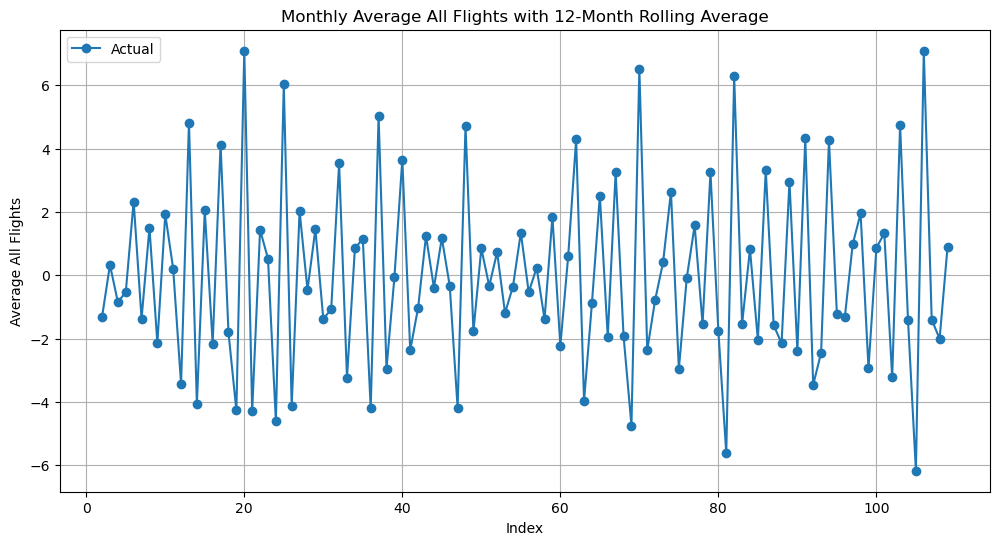

In [24]:
# rolling_avg = df['All_Flights_diff2'].rolling(window=12).mean()

# Plot data aktual dan rolling average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['All_Flights_diff2'], marker='o', linestyle='-', label='Actual')
# plt.plot(df.index, rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')
plt.title('Monthly Average All Flights with 12-Month Rolling Average')
plt.xlabel('Index')
plt.ylabel('Average All Flights')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

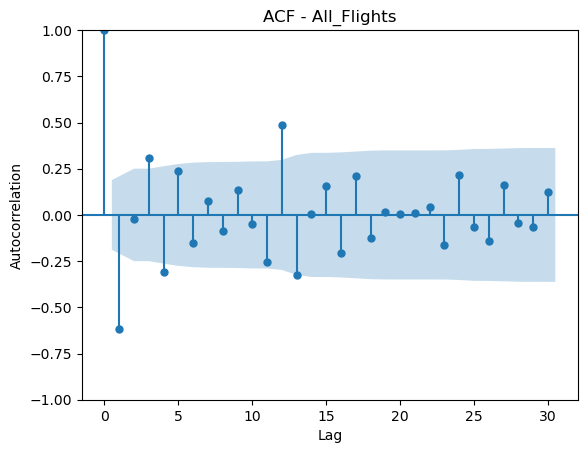

<Figure size 1200x600 with 0 Axes>

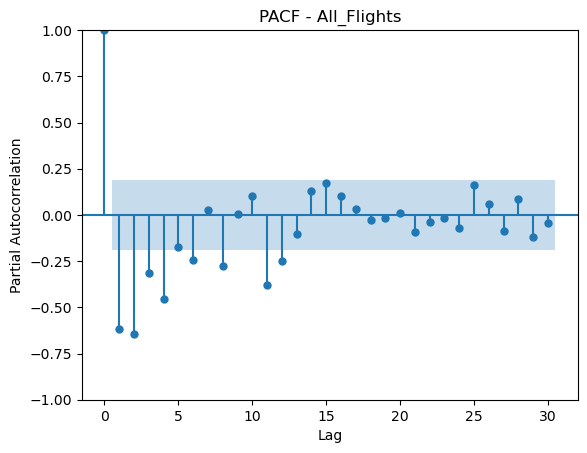

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df['All_Flights_diff2'], lags=30, title='ACF - All_Flights')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['All_Flights_diff2'], lags=30, title='PACF - All_Flights')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:      All_Flights_diff2   No. Observations:                   86
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -230.568
Date:                Thu, 20 Jun 2024   AIC                            467.136
Time:                        17:44:03   BIC                            474.429
Sample:                             0   HQIC                           470.068
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7082      0.099     -7.160      0.000      -0.902      -0.514
ma.L1         -0.9996     11.134     -0.090      0.928     -22.823      20.823
sigma2        13.1766    146.978      0.090      0.9

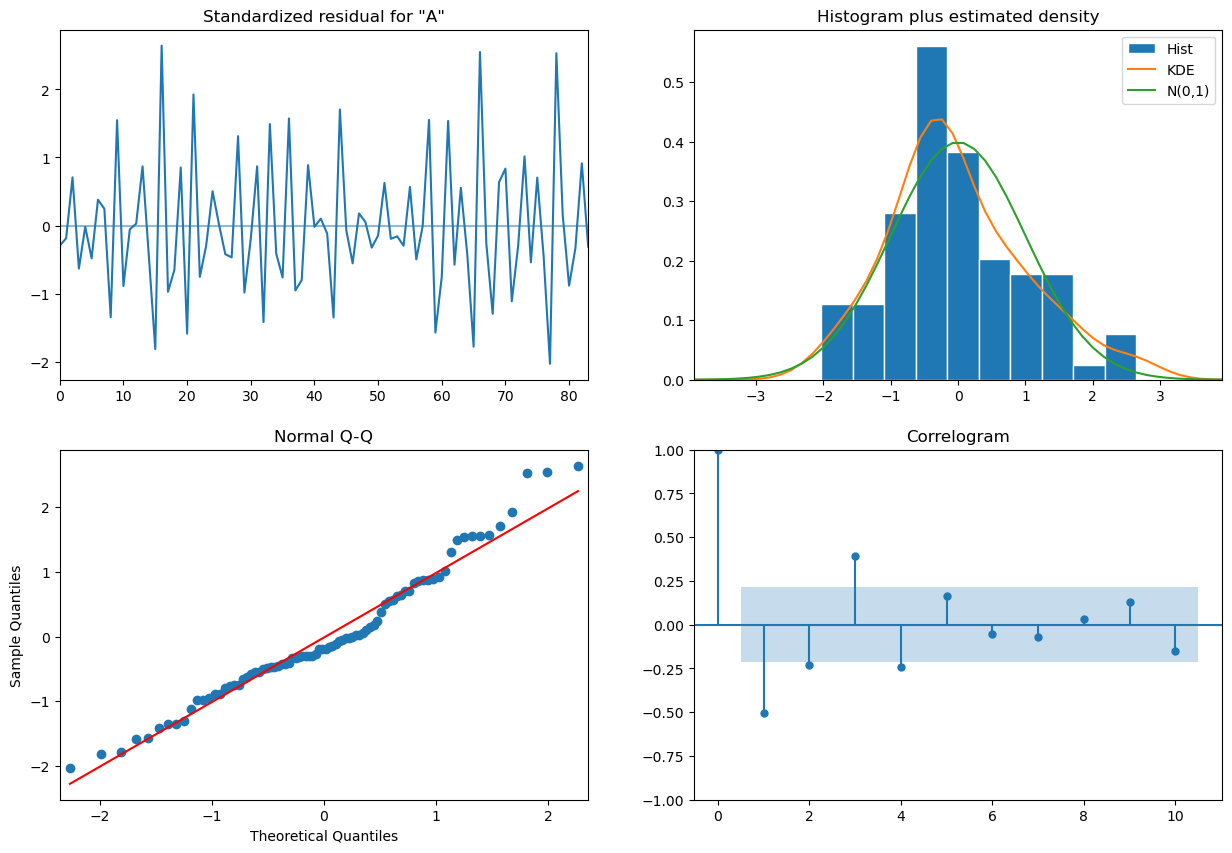

86    1.914561
87   -0.536994
88    1.221331
89   -0.001774
90    0.886564
91    0.279582
92    0.731583
93    0.433614
94    0.666773
95    0.523788
96    0.647187
97    0.581933
Name: predicted_mean, dtype: float64
MAE: 2.9201079856404353
RMSE: 3.415044445804428


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Misalkan df['All_Flights'] adalah data asli sebelum differensiasi
# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(df) * 0.8)
train, test = df['All_Flights_diff2'][:train_size], df['All_Flights_diff2'][train_size:]

# Melatih model ARIMA menggunakan set pelatihan
model = ARIMA(train, order=(1, 2, 1))
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=len(test))  # Prediksi untuk panjang set pengujian

forecast1 = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast1)


# Nilai sebenarnya dari set pengujian
y_true = test.values

# Menghitung MAE, RMSE, dan MAPE
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mean_squared_error(y_true, forecast))
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


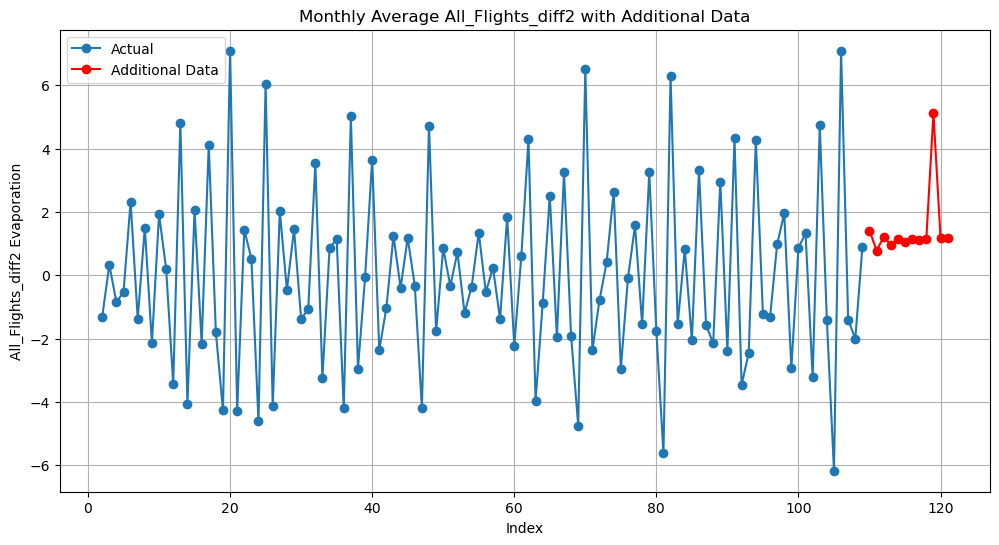

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh dengan format yang diberikan
data = {
    'Index': [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,121],
    'All_Flights_diff2': [1.411776, 0.779562, 1.209150, 0.961663, 1.145924, 1.054874, 
                          1.139381, 1.111940, 1.155885, 5.1154310, 1.181761, 1.190703]
}

# Ubah menjadi dataframe
df_additional = pd.DataFrame(data)

# Plot data aktual dan tambahan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['All_Flights_diff2'], marker='o', linestyle='-', label='Actual', markevery=1)
plt.plot(df_additional['Index'], df_additional['All_Flights_diff2'], marker='o', linestyle='-', color='red', label='Additional Data')
plt.title('Monthly Average All_Flights_diff2 with Additional Data')
plt.xlabel('Index')
plt.ylabel('All_Flights_diff2 Evaporation')
plt.legend()
plt.grid(True)
plt.show()


### Rainfall

In [52]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
df['Rainfall_diff'] = df['Rainfall'].diff()

# Drop NaN values after differencing
df.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df['Rainfall_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -6.941506781170071
p-value: 1.022282381893826e-09
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097


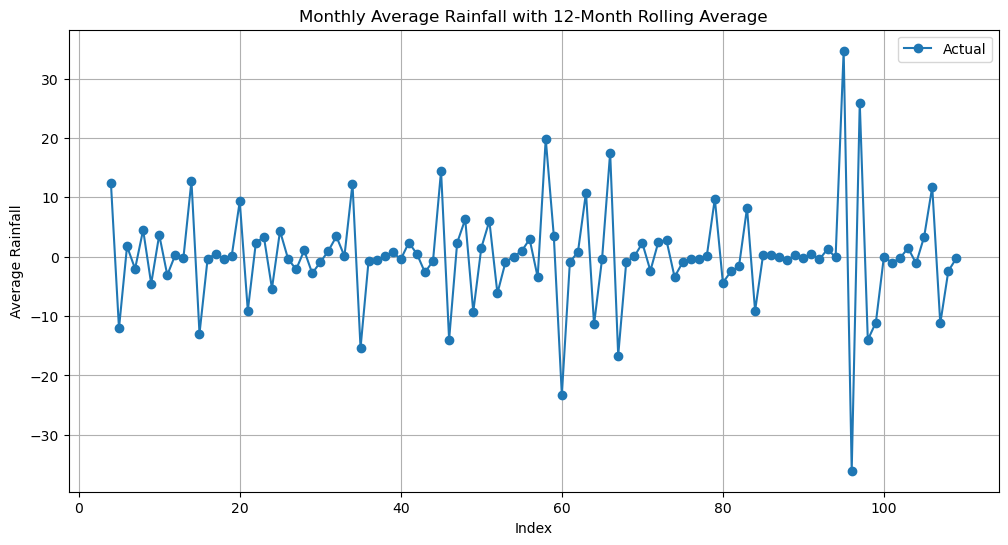

In [53]:
# rolling_avg = df['All_Flights_diff2'].rolling(window=12).mean()

# Plot data aktual dan rolling average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rainfall_diff'], marker='o', linestyle='-', label='Actual')
# plt.plot(df.index, rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')
plt.title('Monthly Average Rainfall with 12-Month Rolling Average')
plt.xlabel('Index')
plt.ylabel('Average Rainfall')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

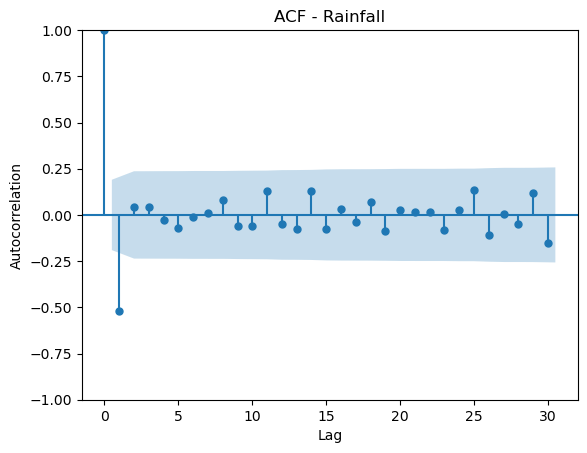

<Figure size 1200x600 with 0 Axes>

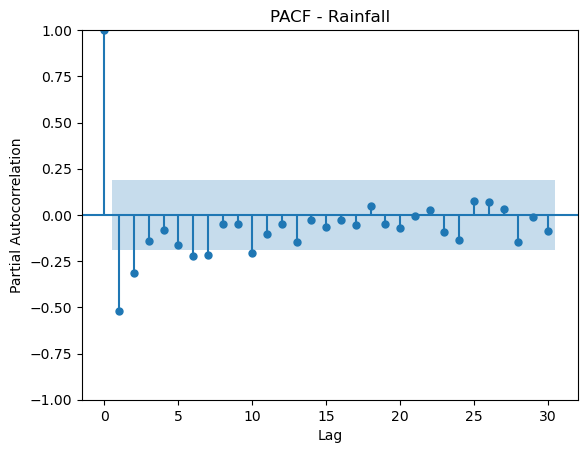

In [54]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df['Rainfall_diff'], lags=30, title='ACF - Rainfall')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Rainfall_diff'], lags=30, title='PACF - Rainfall')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:          Rainfall_diff   No. Observations:                   84
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -259.486
Date:                Thu, 20 Jun 2024   AIC                            526.971
Time:                        19:29:37   BIC                            536.646
Sample:                             0   HQIC                           530.858
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0720      0.125      0.575      0.565      -0.173       0.317
ma.L1         -1.9963      5.159     -0.387      0.699     -12.109       8.116
ma.L2          0.9994      5.173      0.193      0.8

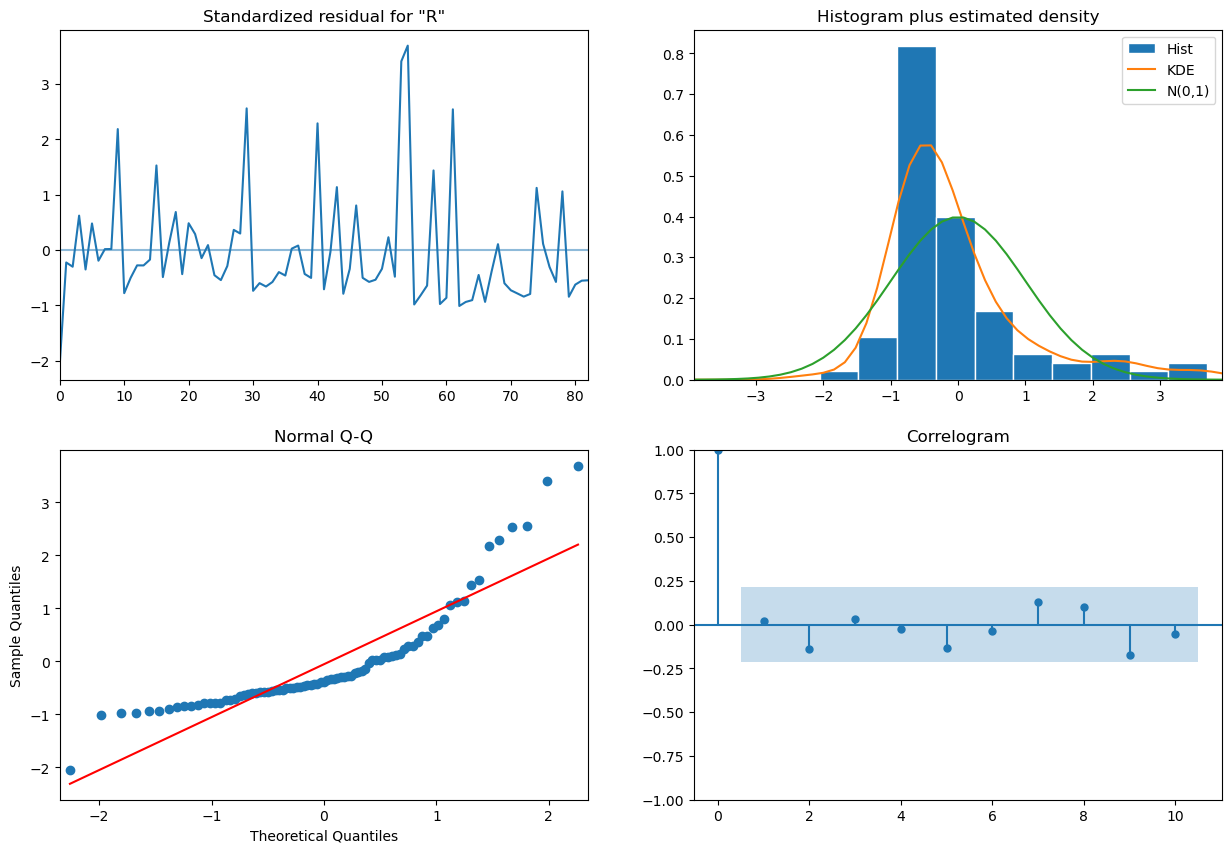

84    2.686754
85    0.136129
86   -0.047624
87   -0.060862
88   -0.061816
89   -0.061885
90   -0.061890
91   -0.061890
92   -0.061890
93   -0.061890
94   -0.061890
95   -0.061890
Name: predicted_mean, dtype: float64
MAE: 7.287927475042749
RMSE: 13.136651119604076


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Misalkan df['All_Flights'] adalah data asli sebelum differensiasi
# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(df) * 0.8)
train, test = df['Rainfall_diff'][:train_size], df['Rainfall_diff'][train_size:]

# Melatih model ARIMA menggunakan set pelatihan
model = ARIMA(train, order=(1, 1, 2))
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=len(test))  # Prediksi untuk panjang set pengujian

forecast1 = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast1)


# Nilai sebenarnya dari set pengujian
y_true = test.values

# Menghitung MAE, RMSE, dan MAPE
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mean_squared_error(y_true, forecast))
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


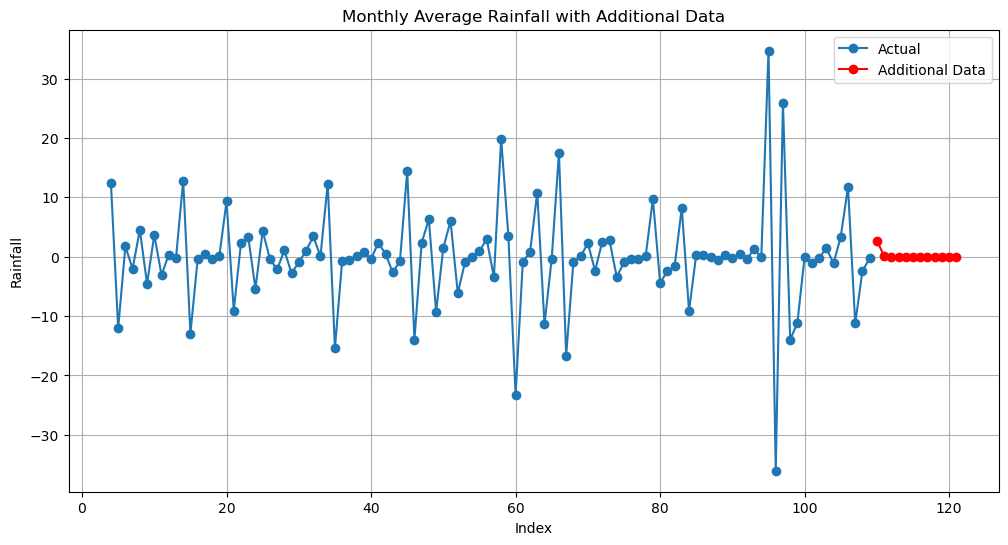

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh dengan format yang diberikan
data = {
    'Index': [ 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,121],
    'Rainfall_diff': [2.686754, 0.136129, -0.047624, -0.060862, -0.061816, -0.061885,
    -0.061890, -0.061890, -0.061890, -0.061890, -0.061890, -0.061890]
}

# Ubah menjadi dataframe
df_additional = pd.DataFrame(data)

# Plot data aktual dan tambahan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rainfall_diff'], marker='o', linestyle='-', label='Actual', markevery=1)
plt.plot(df_additional['Index'], df_additional['Rainfall_diff'], marker='o', linestyle='-', color='red', label='Additional Data')
plt.title('Monthly Average Rainfall with Additional Data')
plt.xlabel('Index')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()


### Max

In [33]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
df['MaxTemp_diff'] = df['MaxTemp'].diff()

# Drop NaN values after differencing
df.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df['MaxTemp_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -5.152543760048093
p-value: 1.0980789492996502e-05
Critical Values:
	1%: -3.502704609582561
	5%: -2.8931578098779522
	10%: -2.583636712914788


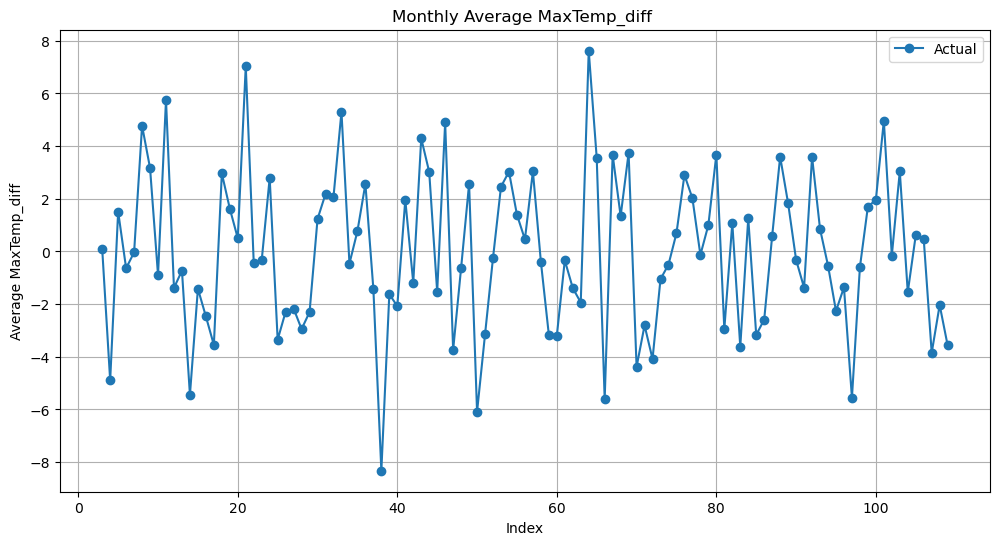

In [34]:
# rolling_avg = df['All_Flights_diff2'].rolling(window=12).mean()

# Plot data aktual dan rolling average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MaxTemp_diff'], marker='o', linestyle='-', label='Actual')
# plt.plot(df.index, rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')
plt.title('Monthly Average MaxTemp_diff ')
plt.xlabel('Index')
plt.ylabel('Average MaxTemp_diff')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

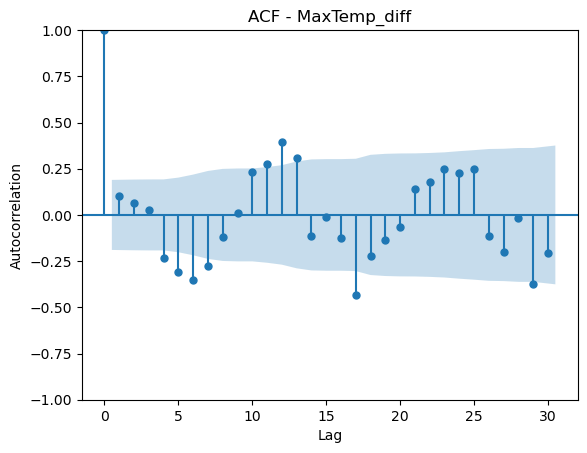

<Figure size 1200x600 with 0 Axes>

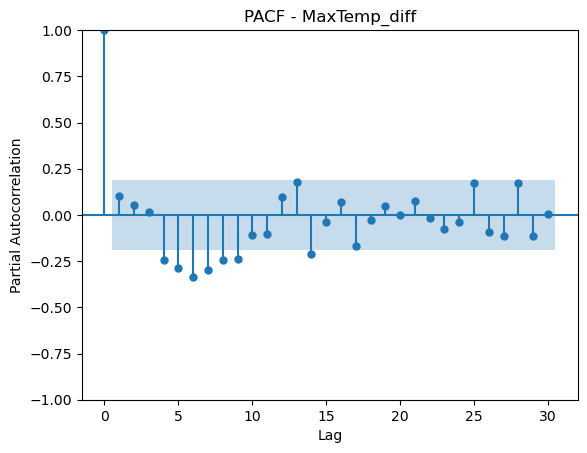

In [35]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df['MaxTemp_diff'], lags=30, title='ACF - MaxTemp_diff')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['MaxTemp_diff'], lags=30, title='PACF - MaxTemp_diff')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: Use

                               SARIMAX Results                                
Dep. Variable:           MaxTemp_diff   No. Observations:                   85
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -211.545
Date:                Thu, 20 Jun 2024   AIC                            437.089
Time:                        17:44:07   BIC                            454.105
Sample:                             0   HQIC                           443.929
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4021      0.192     -7.298      0.000      -1.779      -1.026
ar.L2         -0.7439      0.280     -2.660      0.008      -1.292      -0.196
ar.L3          0.1566      0.177      0.887      0.3

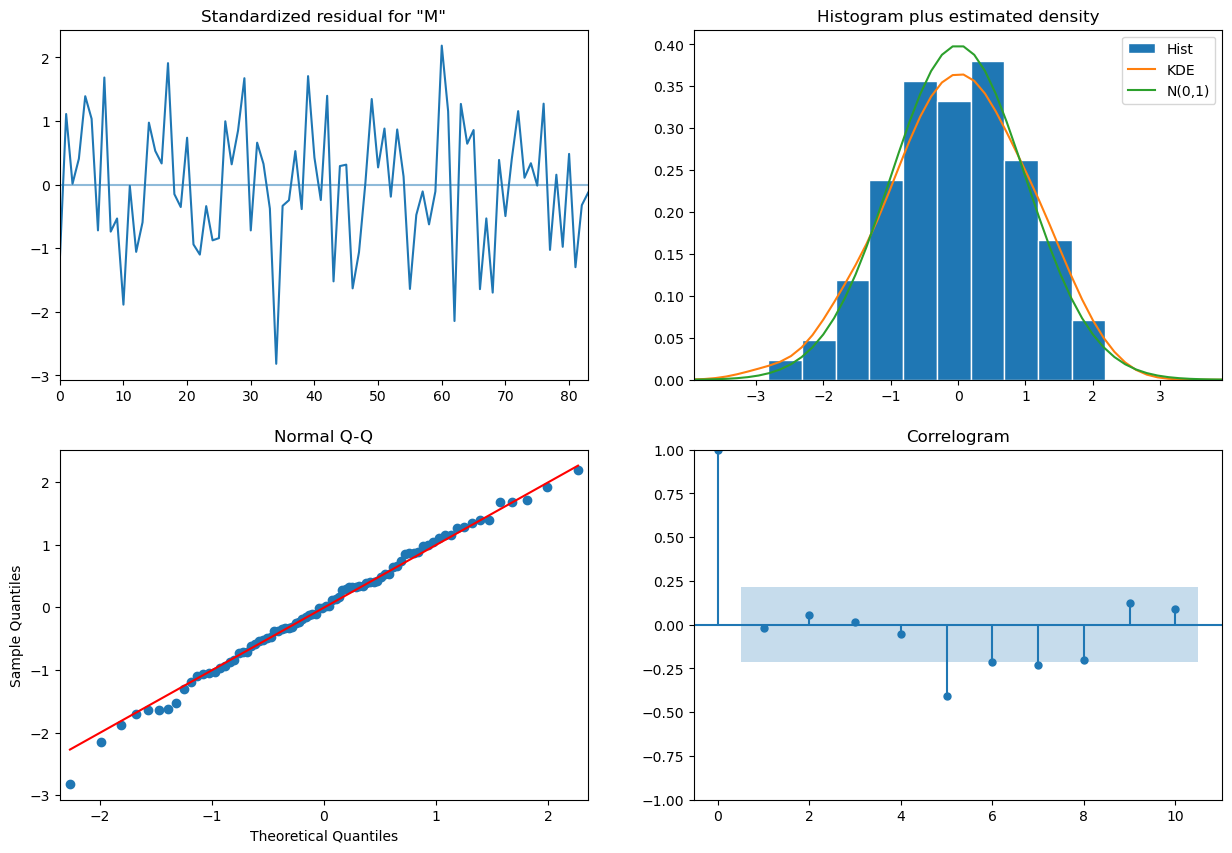

85   -1.009682
86    0.079982
87    0.591690
88   -1.187091
89    1.096975
90   -0.702164
91   -0.157289
92    0.774862
93   -1.219249
94    0.968638
95   -0.469609
96   -0.392925
Name: predicted_mean, dtype: float64
MAE: 2.158148276719753
RMSE: 2.830681138237523


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Misalkan df['All_Flights'] adalah data asli sebelum differensiasi
# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(df) * 0.8)
train, test = df['MaxTemp_diff'][:train_size], df['MaxTemp_diff'][train_size:]

# Melatih model ARIMA menggunakan set pelatihan
model = ARIMA(train, order=(3, 1, 3))
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=len(test))  # Prediksi untuk panjang set pengujian

forecast1 = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast1)


# Nilai sebenarnya dari set pengujian
y_true = test.values

# Menghitung MAE, RMSE, dan MAPE
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mean_squared_error(y_true, forecast))
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


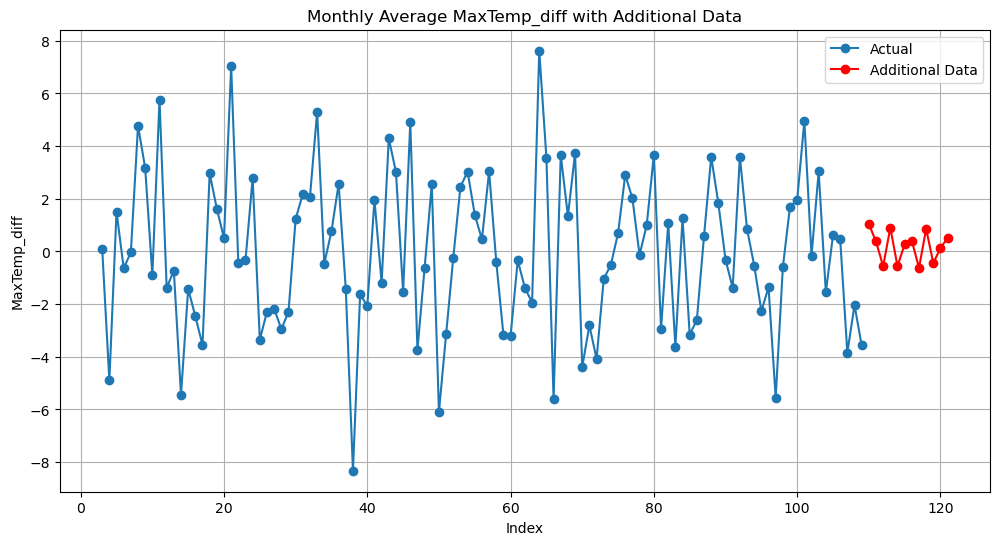

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh dengan format yang diberikan
data = {
    'Index': [ 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,121],
    'MaxTemp_diff': [1.043822, 0.378889, -0.563488, 0.903945, -0.562480, 0.273524, 
                     0.406767, -0.625223, 0.858776, -0.447837, 0.136082, 0.508644]
}

# Ubah menjadi dataframe
df_additional = pd.DataFrame(data)

# Plot data aktual dan tambahan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MaxTemp_diff'], marker='o', linestyle='-', label='Actual', markevery=1)
plt.plot(df_additional['Index'], df_additional['MaxTemp_diff'], marker='o', linestyle='-', color='red', label='Additional Data')
plt.title('Monthly Average MaxTemp_diff with Additional Data')
plt.xlabel('Index')
plt.ylabel('MaxTemp_diff')
plt.legend()
plt.grid(True)
plt.show()


### Min

In [38]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
# df['MinTemp_diff'] = df['MinTemp'].diff()

# # Drop NaN values after differencing
# df.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df['MinTemp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -9.106720248752875
p-value: 3.4865708700248097e-15
Critical Values:
	1%: -3.4968181663902103
	5%: -2.8906107514600103
	10%: -2.5822770483285953


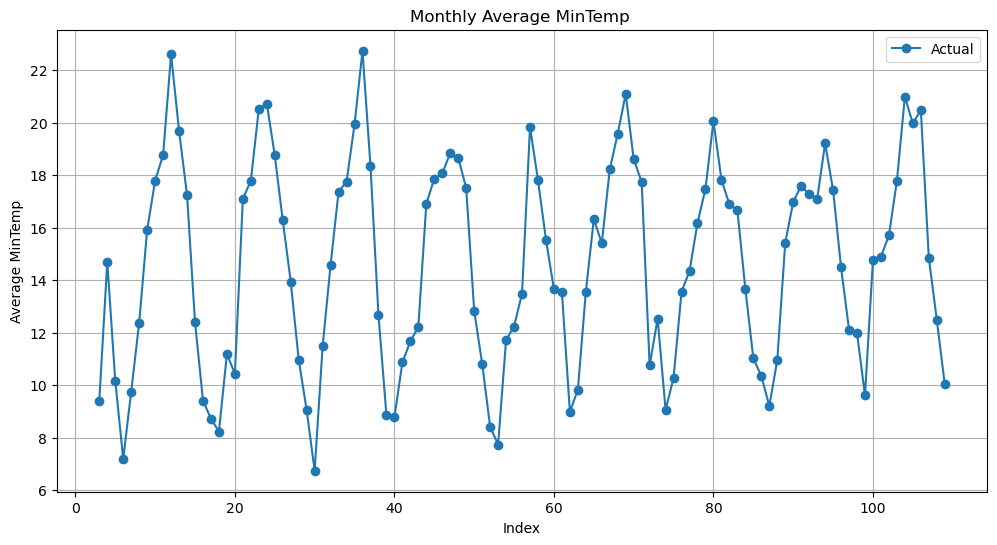

In [39]:
# rolling_avg = df['All_Flights_diff2'].rolling(window=12).mean()

# Plot data aktual dan rolling average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MinTemp'], marker='o', linestyle='-', label='Actual')
# plt.plot(df.index, rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')
plt.title('Monthly Average MinTemp ')
plt.xlabel('Index')
plt.ylabel('Average MinTemp')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

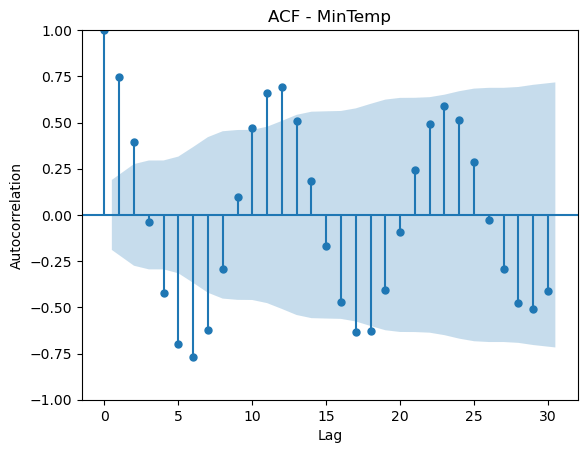

<Figure size 1200x600 with 0 Axes>

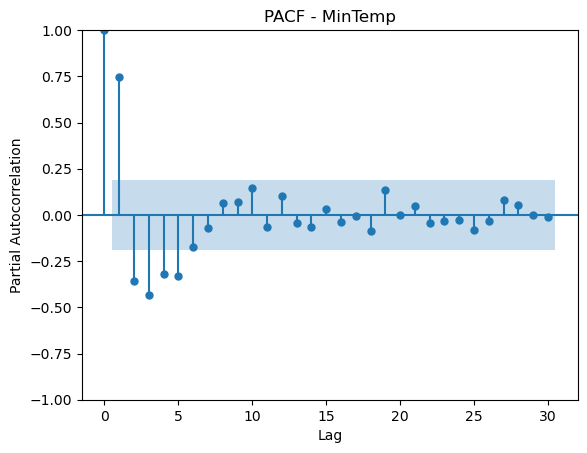

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df['MinTemp'], lags=30, title='ACF - MinTemp')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['MinTemp'], lags=30, title='PACF - MinTemp')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                MinTemp   No. Observations:                   85
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -197.524
Date:                Thu, 20 Jun 2024   AIC                            405.049
Time:                        17:44:09   BIC                            417.262
Sample:                             0   HQIC                           409.961
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0749      0.990     14.216      0.000      12.134      16.015
ar.L1          0.5389      0.180      2.989      0.003       0.186       0.892
ma.L1          0.4344      0.196      2.222      0.0

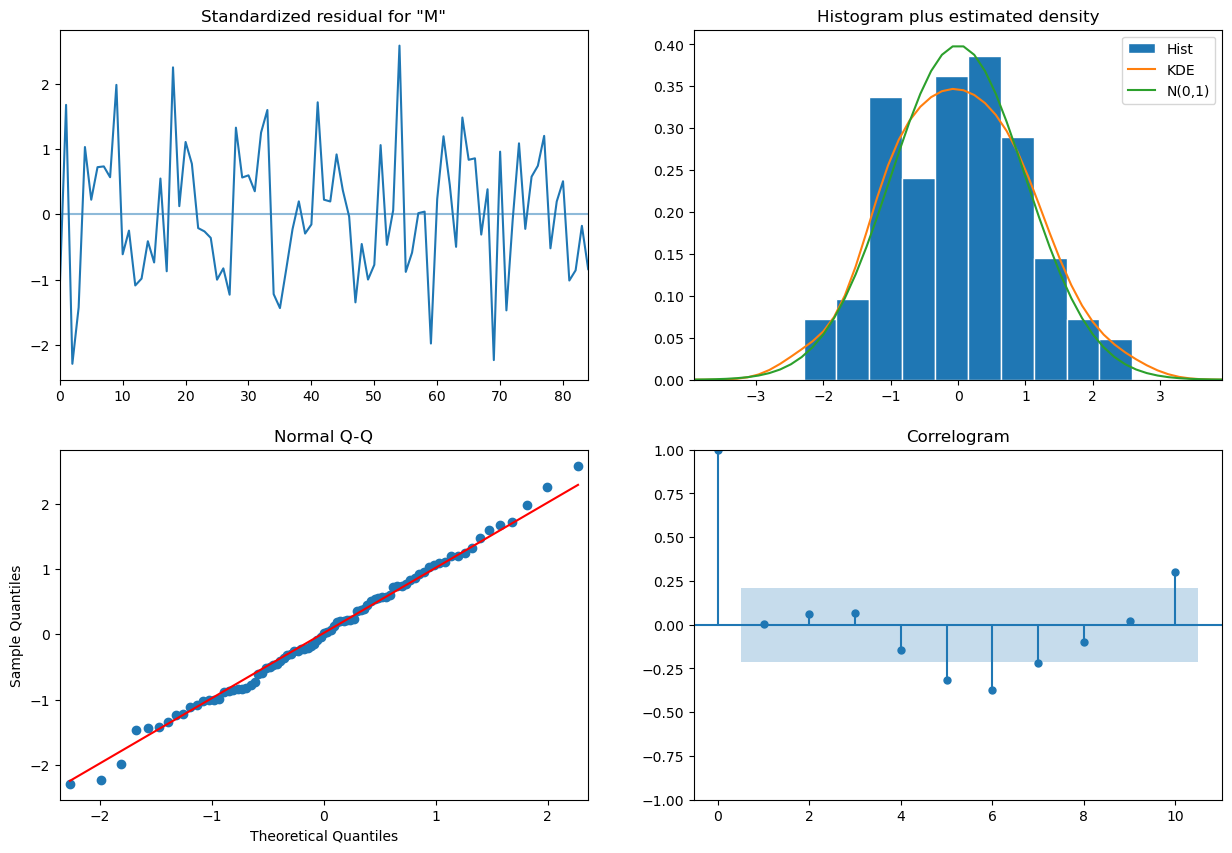

85    10.424868
86    11.507253
87    12.691106
88    13.329127
89    13.672980
90    13.858295
91    13.958168
92    14.011993
93    14.041002
94    14.056635
95    14.065061
96    14.069602
Name: predicted_mean, dtype: float64
MAE: 3.1786471429290746
RMSE: 3.716790927791972


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Misalkan df['All_Flights'] adalah data asli sebelum differensiasi
# Membagi data menjadi set pelatihan dan pengujian
train_size = int(len(df) * 0.8)
train, test = df['MinTemp'][:train_size], df['MinTemp'][train_size:]

# Melatih model ARIMA menggunakan set pelatihan
model = ARIMA(train, order=(1, 0, 2))
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=len(test))  # Prediksi untuk panjang set pengujian

forecast1 = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast1)


# Nilai sebenarnya dari set pengujian
y_true = test.values

# Menghitung MAE, RMSE, dan MAPE
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mean_squared_error(y_true, forecast))
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')



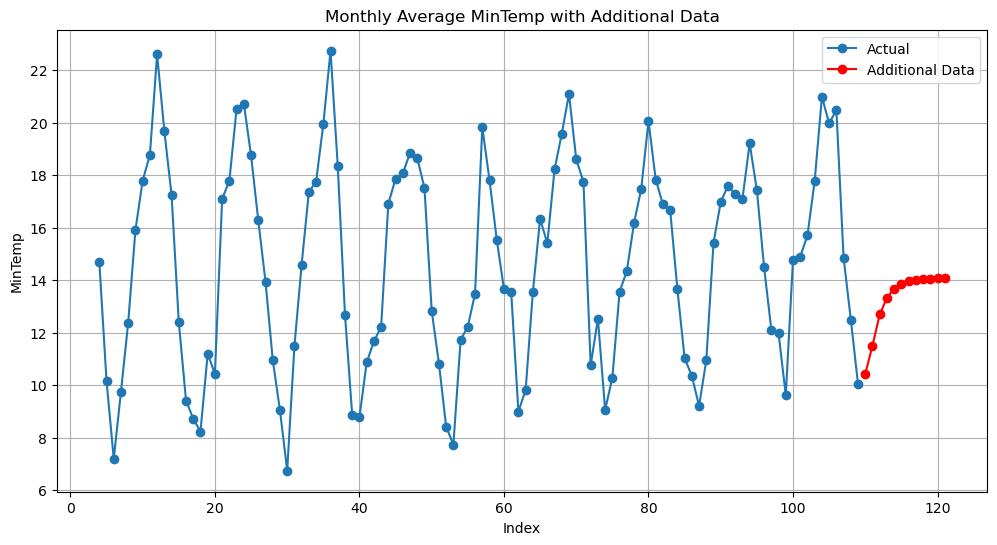

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh dengan format yang diberikan
data = {
    'Index': [ 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,121],
    'MinTemp': [10.424868, 11.507253, 12.691106, 13.329127, 13.672980, 13.858295,
                 13.958168, 14.011993, 14.041002, 14.056635, 14.065061, 14.069602]
}

# Ubah menjadi dataframe
df_additional = pd.DataFrame(data)

# Plot data aktual dan tambahan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MinTemp'], marker='o', linestyle='-', label='Actual', markevery=1)
plt.plot(df_additional['Index'], df_additional['MinTemp'], marker='o', linestyle='-', color='red', label='Additional Data')
plt.title('Monthly Average MinTemp with Additional Data')
plt.xlabel('Index')
plt.ylabel('MinTemp')
plt.legend()
plt.grid(True)
plt.show()


### Evaporation

In [43]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
# df['All_Flights_diff'] = df['All_Flights'].diff()

# # Drop NaN values after differencing
# df.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df['Evaporation'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.658456579992353
p-value: 0.0047369312395335
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157


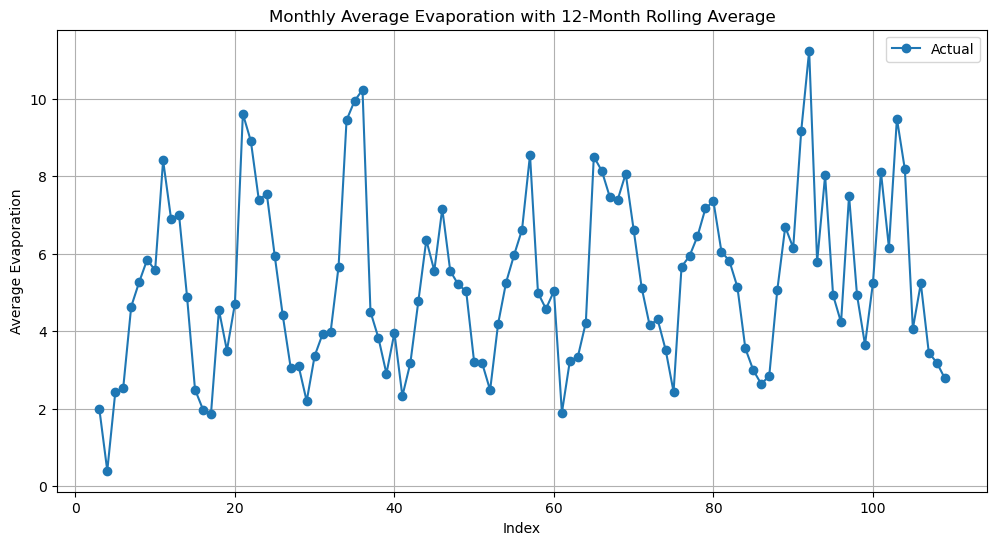

In [44]:
# rolling_avg = df['All_Flights_diff2'].rolling(window=12).mean()

# Plot data aktual dan rolling average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Evaporation'], marker='o', linestyle='-', label='Actual')
# plt.plot(df.index, rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')
plt.title('Monthly Average Evaporation with 12-Month Rolling Average')
plt.xlabel('Index')
plt.ylabel('Average Evaporation')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

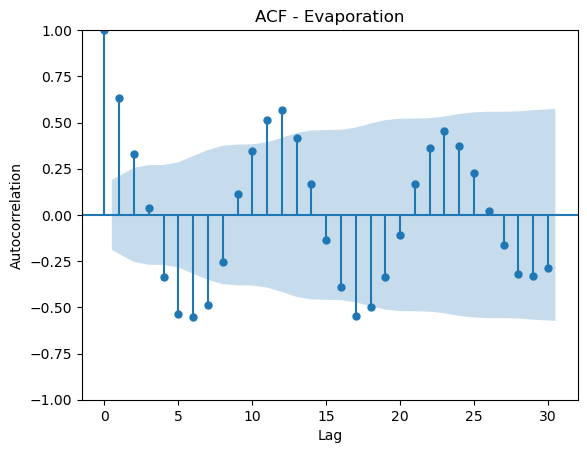

<Figure size 1200x600 with 0 Axes>

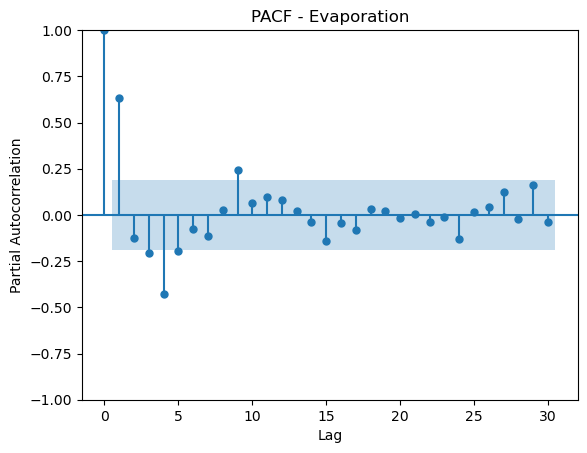

In [45]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df['Evaporation'], lags=30, title='ACF - Evaporation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Evaporation'], lags=30, title='PACF - Evaporation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Evaporation   No. Observations:                  107
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -206.435
Date:                Thu, 20 Jun 2024   AIC                            422.870
Time:                        17:44:11   BIC                            436.234
Sample:                             0   HQIC                           428.288
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1620      0.486     10.613      0.000       4.209       6.115
ar.L1          0.5512      0.194      2.846      0.004       0.172       0.931
ma.L1          0.0880      0.214      0.411      0.6

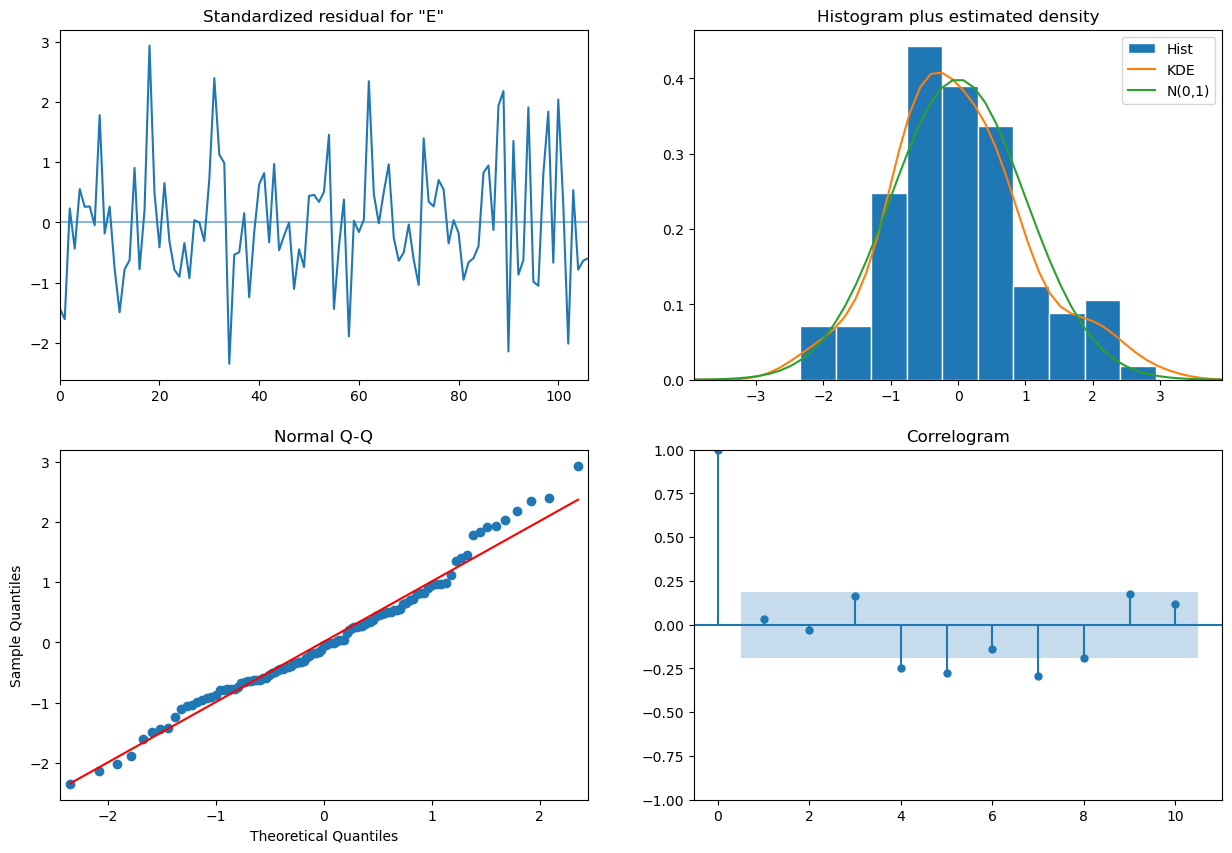

107    3.598105
108    4.142918
109    4.600310
110    4.852416
111    4.991372
112    5.067963
113    5.110178
114    5.133446
115    5.146271
116    5.153340
117    5.157236
118    5.159383
Name: predicted_mean, dtype: float64


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [46]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Evaporation'], order=(1, 0, 2))

# Melatih model ARIMA
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast)


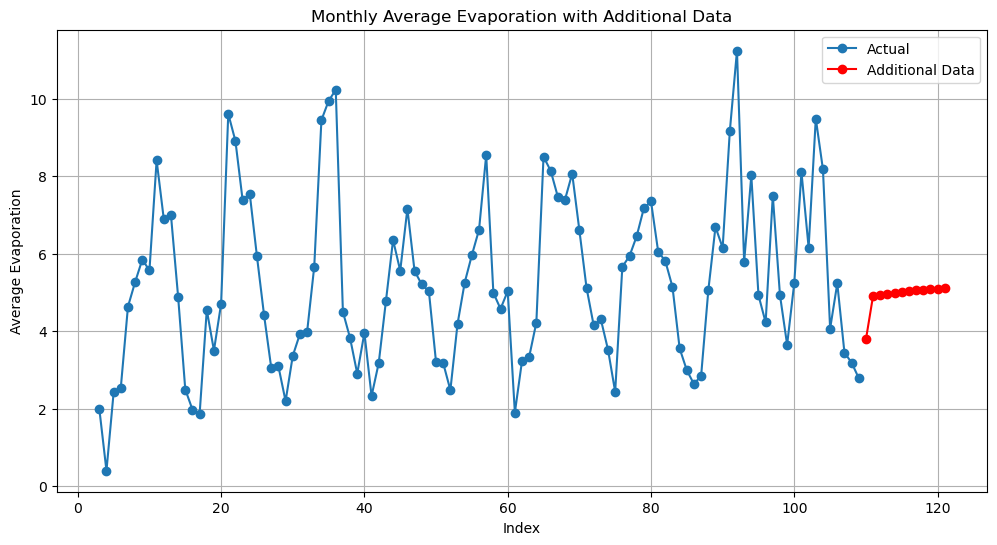

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh dengan format yang diberikan
data = {
    'Index': [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,121],
    'Evaporation': [3.789429, 4.916019, 4.942564, 4.967238, 4.990173, 5.011492, 
                    5.031308, 5.049728, 5.066849, 5.082764, 5.097557, 5.111307],
}

# Ubah menjadi dataframe
df_additional = pd.DataFrame(data)

# Plot data aktual dan tambahan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Evaporation'], marker='o', linestyle='-', label='Actual', markevery=1)
plt.plot(df_additional['Index'], df_additional['Evaporation'], marker='o', linestyle='-', color='red', label='Additional Data')
plt.title('Monthly Average Evaporation with Additional Data')
plt.xlabel('Index')
plt.ylabel('Average Evaporation')
plt.legend()
plt.grid(True)
plt.show()


### Sunshine

In [48]:
from statsmodels.tsa.stattools import adfuller
# Step 1: Apply differencing to 'All_Flights' column
# df['All_Flights_diff'] = df['All_Flights'].diff()

# # Drop NaN values after differencing
# df.dropna(inplace=True)

# Step 2: Perform Augmented Dickey-Fuller Test (ADF Test) on differenced data
result = adfuller(df['Sunshine'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -5.9053288282241345
p-value: 2.717141541755618e-07
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097


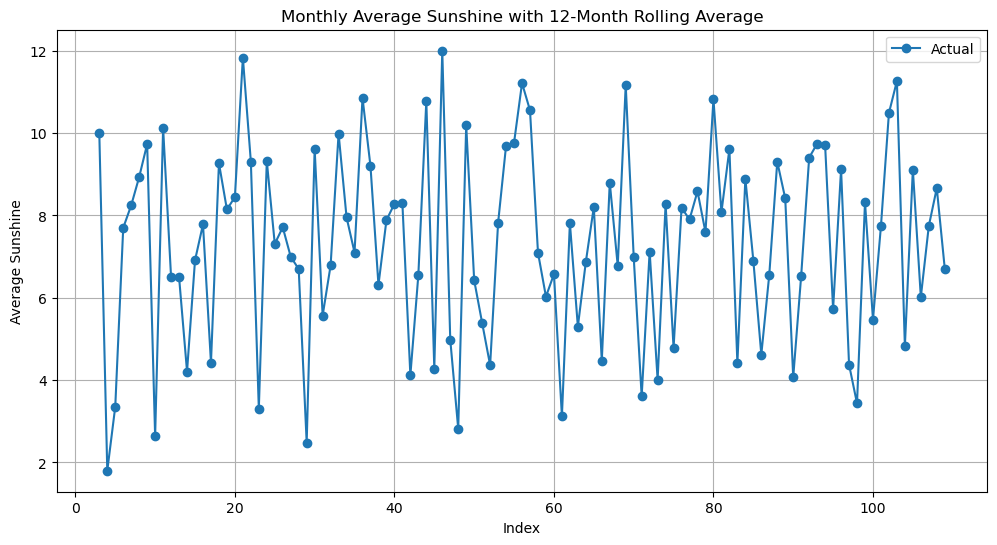

In [49]:
# rolling_avg = df['All_Flights_diff2'].rolling(window=12).mean()

# Plot data aktual dan rolling average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sunshine'], marker='o', linestyle='-', label='Actual')
# plt.plot(df.index, rolling_avg, linestyle='--', color='red', label='12-Month Rolling Average')
plt.title('Monthly Average Sunshine with 12-Month Rolling Average')
plt.xlabel('Index')
plt.ylabel('Average Sunshine')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

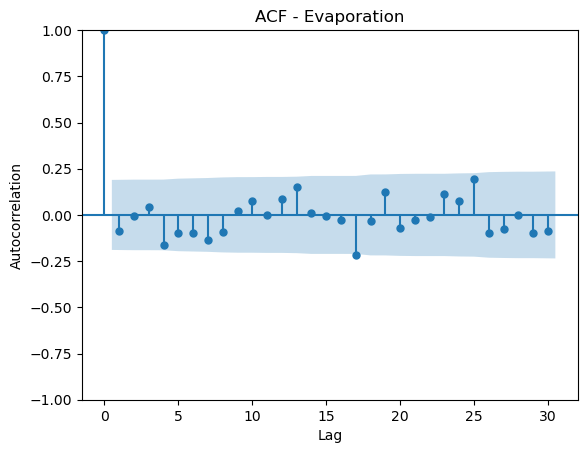

<Figure size 1200x600 with 0 Axes>

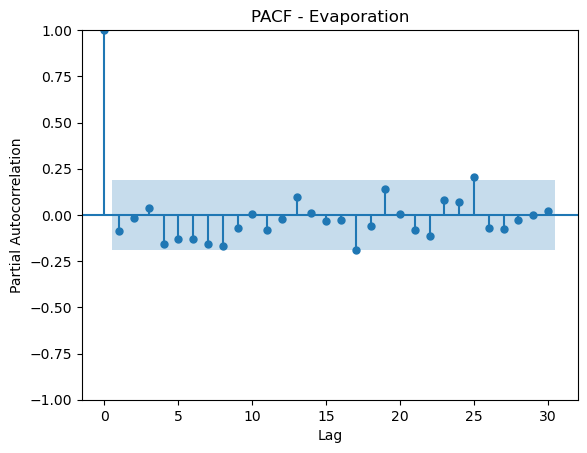

In [50]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for 'All_Flights'
plt.figure(figsize=(12, 6))
plot_acf(df['Sunshine'], lags=30, title='ACF - Evaporation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Sunshine'], lags=30, title='PACF - Evaporation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Sunshine   No. Observations:                  107
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -237.464
Date:                Thu, 20 Jun 2024   AIC                            486.929
Time:                        17:44:13   BIC                            502.966
Sample:                             0   HQIC                           493.430
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3438      0.029    250.424      0.000       7.286       7.401
ar.L1         -0.2112      0.187     -1.129      0.259      -0.578       0.155
ar.L2          0.7384      0.185      3.998      0.0

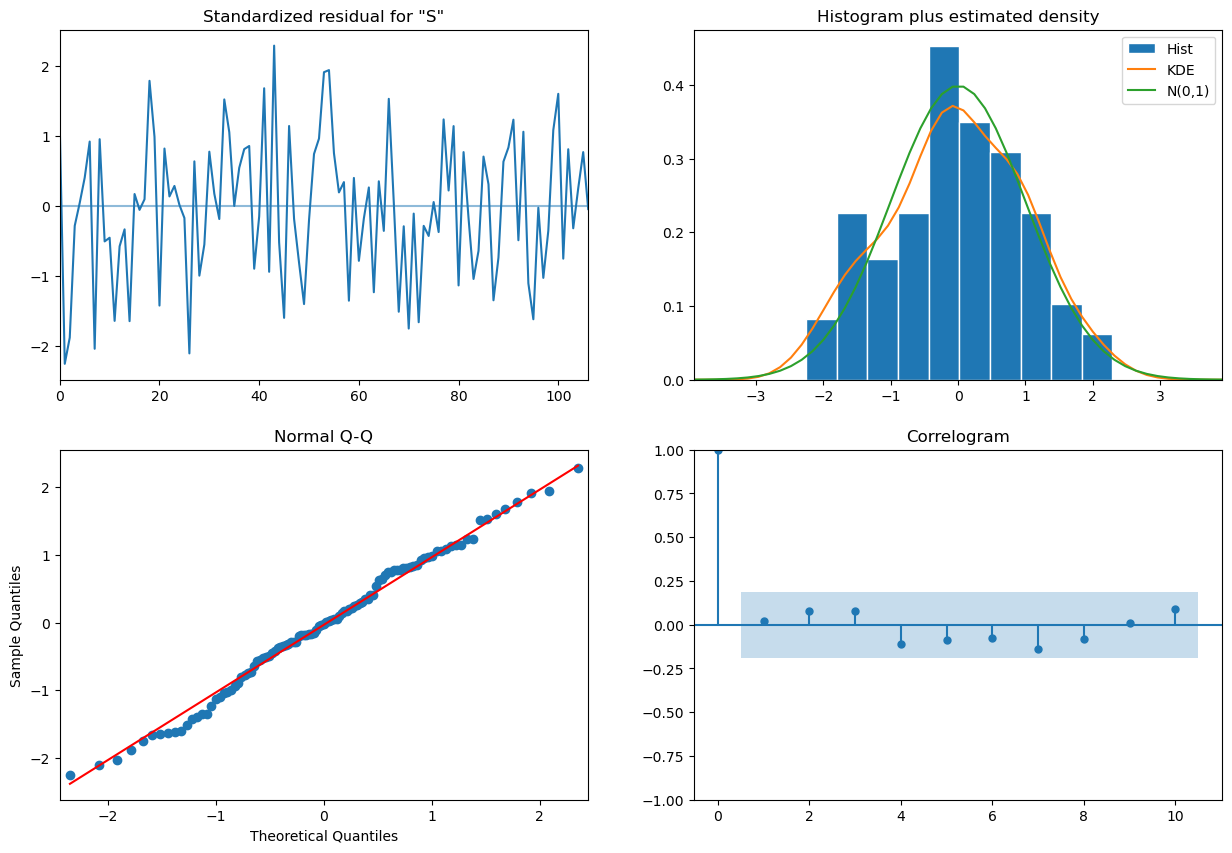

107    6.792449
108    7.086867
109    6.990948
110    7.228614
111    7.107589
112    7.308650
113    7.176817
114    7.353129
115    7.218542
116    7.377162
117    7.244278
118    7.389473
Name: predicted_mean, dtype: float64


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sunshine'], order=(2, 0, 2))

# Melatih model ARIMA
model_fit = model.fit()

# Ringkasan model
print(model_fit.summary())

# Plot residual dari model
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

# Prediksi menggunakan model ARIMA
forecast = model_fit.forecast(steps=12)  # Prediksi 12 bulan ke depan
print(forecast)
